In [21]:
import cv2
import glob
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 

In [15]:
path2data = "../../Datasets/ALL_IDB1/ALL_IDB1/im/"
filenames = os.listdir(path2data)[:]
img = cv2.imread(path2data+filenames[0])

In [16]:
count = []
for bb,imgs in enumerate(filenames):
    print(bb,imgs)

    img = cv2.imread(path2data+imgs)
    img = cv2.resize(img, (960, 640))
    
    #-----Converting image to LAB Color model----------------------------------- 
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#     cv2.imshow("lab",lab)

    #-----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)
#     cv2.imshow('l_channel', l)
#     cv2.imshow('a_channel', a)
#     cv2.imshow('b_channel', b)

    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
#     cv2.imshow('CLAHE output', cl)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
#     cv2.imshow('limg', limg)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
#     cv2.imshow('final', final)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    image = cv2.GaussianBlur(final,(5,5),0)
#     cv2.imshow('Filtered_original',image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()



    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(final, cv2.MORPH_CLOSE, kernel)
    HSV = cv2.cvtColor(closing, cv2.COLOR_BGR2HSV)
#     cv2.imshow('RGB to HSV Color Conversion',HSV)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

    #masking/thresholding
    lower = np.array([130,146,70])
    upper = np.array([255,255,180])

    final = cv2.inRange(HSV, lower, upper)
#     cv2.imshow('Masked',final)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()


    #morphology
    kernal = np.ones((3,3),np.uint8)
#    useful in removing noise ---> MORPH_OPEN:noise in background
    final = cv2.morphologyEx(final,cv2.MORPH_OPEN,kernal, iterations = 2)
#     cv2.imshow('Morthology',final)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    

   # Find contours
    (contours, _) = cv2.findContours(final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    redundent = []
    for (i, c) in enumerate(contours):
        
        # Obtain bounding rectangle to get measurements
        x,y,w,h = cv2.boundingRect(c)
        if w>10 : 
            # Draw the contour and center of the shape on the image
            box = cv2.rectangle(img,(x,y),(x+w+10,y+h+10),(36,255,12), 4) 
            # +10 Larger box had to be chosen to fully select the region or we can decide based on image size as input for task2 
        else :
            redundent.append(i)
#     cv2.imshow('box',box)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    cv2.imwrite('DetectedImages/'+imgs, img)

    print(redundent)
    for index in sorted(redundent, reverse=True):
        del contours[index]
    print("Found %d objects." % len(contours))
    count.append(len(contours))

    
# cv2.waitKey(0)
# cv2.destroyAllWindows()


0 Im001_1.jpg
[2, 3, 9]
Found 18 objects.
1 Im002_1.jpg
[2, 7, 13, 23]
Found 21 objects.
2 Im003_1.jpg
[]
Found 15 objects.
3 Im004_1.jpg
[1, 2, 4]
Found 11 objects.
4 Im005_1.jpg
[9, 17, 21, 24, 29, 33, 37]
Found 33 objects.
5 Im006_1.jpg
[13, 14, 21, 23, 26]
Found 25 objects.
6 Im007_1.jpg
[11, 13]
Found 13 objects.
7 Im008_1.jpg
[12]
Found 26 objects.
8 Im009_1.jpg
[2, 15]
Found 15 objects.
9 Im010_1.jpg
[8, 10, 12, 13, 23]
Found 20 objects.
10 Im011_1.jpg
[15, 19, 20, 21, 23]
Found 20 objects.
11 Im012_1.jpg
[14]
Found 16 objects.
12 Im013_1.jpg
[6, 7, 10, 11, 15, 16, 19]
Found 13 objects.
13 Im014_1.jpg
[]
Found 13 objects.
14 Im015_1.jpg
[]
Found 21 objects.
15 Im016_1.jpg
[1]
Found 24 objects.
16 Im017_1.jpg
[2, 3, 4]
Found 2 objects.
17 Im018_1.jpg
[]
Found 21 objects.
18 Im019_1.jpg
[2, 10, 25]
Found 25 objects.
19 Im020_1.jpg
[0, 1, 3, 4, 5, 6, 8]
Found 2 objects.
20 Im021_1.jpg
[0, 2, 4, 5, 7, 8]
Found 3 objects.
21 Im022_1.jpg
[0, 5, 6, 9, 10]
Found 6 objects.
22 Im023_1.jp

In [17]:
y_pred = count
print(len(y_pred))
df = pd.read_csv('WBC_Count_Label.csv')
y_true = df.loc[:,'wbc_count'].values
print(y_true.shape)

108
(108,)


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.4074074074074074

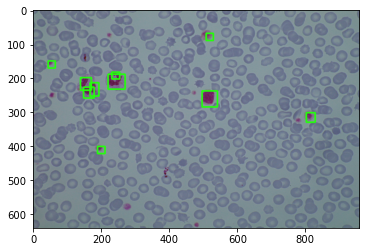

In [23]:
plt.imshow(img)